# Step 1:
## Import Basix Scikit Learn Libraries for Data Manipulation as well Data Visualization.

In [1]:
# Importing Data Manipulation Libraries
import numpy as np
import pandas as pd

# Importing Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Warining Libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# importing machine learning libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Importing Data Logging Libraries
import logging
logging.basicConfig(filename='app.log',
                    level=logging.INFO,
                    filemode= "w",
                    format= "%(asctime)s - %(levelname)s - %(message)s",
                    force= True
                    )

# Step 2 :
## Data Uploading Using Pandas Function

In [2]:
url = "https://raw.githubusercontent.com/Digraskarpratik/Crop_Recommendation_Model/refs/heads/main/Crop_Recommendation.csv"

df = pd.read_csv(url)
df.sample(frac=1)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1577,29,132,204,23.089507,90.225073,6.096753,108.216660,Apple
1561,40,136,202,22.852674,94.576458,5.935336,117.531403,Apple
1542,21,135,198,23.860871,94.920481,5.765015,105.024133,Apple
1801,37,23,28,25.612944,94.313884,5.740055,224.320676,Coconut
1048,83,95,50,26.516823,77.799136,5.509471,108.854751,Banana
...,...,...,...,...,...,...,...,...
640,11,60,23,27.336844,88.502291,7.033013,51.098026,MungBean
347,13,72,21,24.321166,21.027867,5.821194,60.275525,KidneyBeans
1853,24,27,34,28.878630,95.113203,6.203377,145.058312,Coconut
703,42,73,25,34.036792,67.211138,6.501869,73.235736,Blackgram


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
logging.info("Initial Data Loaded Successfully")

In [5]:
# Splitting the Data into Numerical and Categorical Data

Numerical_Data = df.select_dtypes(exclude= "object")

Chategorical_Data = df.select_dtypes(include= "object")

In [6]:
# Checking the Numerical data
Numerical_Data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [7]:
# Checking the Categorical data
Chategorical_Data

,Crop
0,Rice
1,Rice
2,Rice
3,Rice
4,Rice
...,...
2195,Coffee
2196,Coffee
2197,Coffee
2198,Coffee


In [8]:
# Checking for missing values in the dataset
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [29]:
df.Crop.nunique()

22

In [9]:
# Perform Univariate Analysis

from collections import OrderedDict

stats = []

for i in Numerical_Data.columns:
    Numerical_stats = OrderedDict([
        ("feature", i),
        ("mean", df[i].mean()),
        ("median", df[i].median()),
        ("mode", df[i].mode()[0]),
        ("min", df[i].min()),
        ("max", df[i].max()),
        ("range", df[i].max() - df[i].min()),
        ("skewness", df[i].skew()),
        ("kurtosis", df[i].kurtosis()),
        ("standard", df[i].std()),
        ("variance", df[i].var()),
        ("IQR", df[i].quantile(0.75) - df[i].quantile(0.25))
    ])
    
    stats.append(Numerical_stats)
    
df_stats = pd.DataFrame(stats)
#stats_df

df_stats.style.background_gradient( subset= ["mean", "median", "mode", "min", "max", "range", "skewness", "kurtosis", "standard", "variance", "IQR"], cmap="coolwarm")

,feature,mean,median,mode,min,max,range,skewness,kurtosis,standard,variance,IQR
0,Nitrogen,50.551818,37.000000,22.000000,0.000000,140.000000,140.000000,0.509721,-1.058240,36.917334,1362.889537,63.250000
1,Phosphorus,53.362727,51.000000,60.000000,5.000000,145.000000,140.000000,1.010773,0.860279,32.985883,1088.068460,40.000000
2,Potassium,48.149091,32.000000,17.000000,5.000000,205.000000,200.000000,2.375167,4.449354,50.647931,2565.212869,29.000000
3,Temperature,25.616244,25.598693,8.825675,8.825675,43.675493,34.849818,0.184933,1.232555,5.063749,25.641550,5.792279
4,Humidity,71.481779,80.473146,14.258040,14.258040,99.981876,85.723836,-1.091708,0.302134,22.263812,495.677307,29.686818
5,pH_Value,6.469480,6.425045,3.504752,3.504752,9.935091,6.430338,0.283929,1.655581,0.773938,0.598980,0.951950
6,Rainfall,103.463655,94.867624,20.211267,20.211267,298.560117,278.348850,0.965756,0.607079,54.958389,3020.424469,59.715822


In [10]:
logging.info("The Above Dataset is Non Normal Distributed..!!")

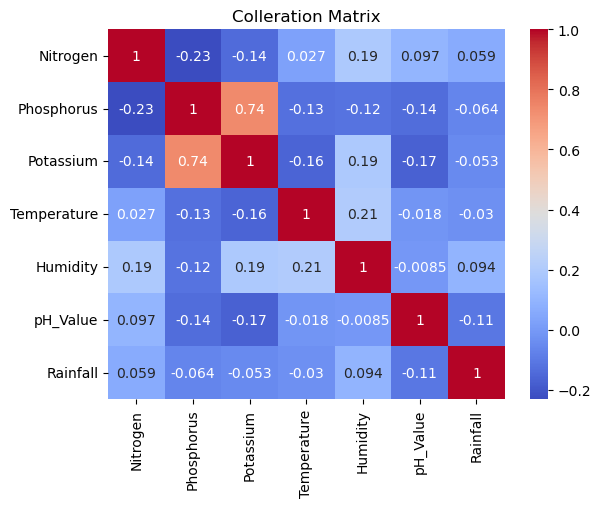

In [12]:
# Checking Correlation Matrix
# x = indepedent variables
# y = dependent variable

sns.heatmap(Numerical_Data.corr(), annot=True,yticklabels= True, cmap= "coolwarm")
plt.title("Colleration Matrix")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
df["Crop"] = LabelEncoder().fit_transform(df["Crop"])

In [14]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


# Feature Engineering :

In [15]:
df.corr()["Crop"]

Nitrogen      -0.031130
Phosphorus    -0.491006
Potassium     -0.346417
Temperature    0.113606
Humidity       0.193911
pH_Value      -0.012253
Rainfall       0.045611
Crop           1.000000
Name: Crop, dtype: float64

In [16]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

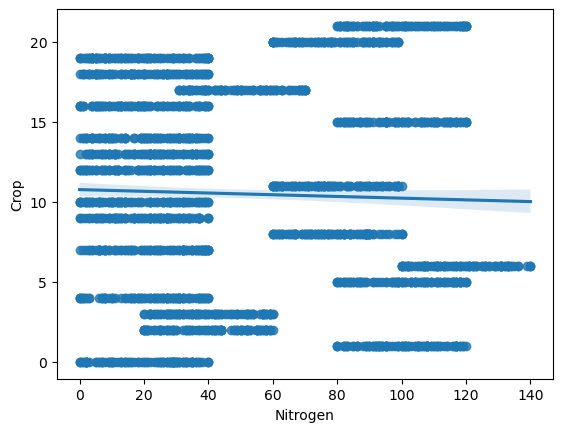

In [17]:
sns.regplot(x = df["Nitrogen"], y = df["Crop"])
plt.show()

In [18]:
df_stats

,feature,mean,median,mode,min,max,range,skewness,kurtosis,standard,variance,IQR
0,Nitrogen,50.551818,37.000000,22.000000,0.000000,140.000000,140.000000,0.509721,-1.058240,36.917334,1362.889537,63.250000
1,Phosphorus,53.362727,51.000000,60.000000,5.000000,145.000000,140.000000,1.010773,0.860279,32.985883,1088.068460,40.000000
2,Potassium,48.149091,32.000000,17.000000,5.000000,205.000000,200.000000,2.375167,4.449354,50.647931,2565.212869,29.000000
3,Temperature,25.616244,25.598693,8.825675,8.825675,43.675493,34.849818,0.184933,1.232555,5.063749,25.641550,5.792279
4,Humidity,71.481779,80.473146,14.258040,14.258040,99.981876,85.723836,-1.091708,0.302134,22.263812,495.677307,29.686818
5,pH_Value,6.469480,6.425045,3.504752,3.504752,9.935091,6.430338,0.283929,1.655581,0.773938,0.598980,0.951950
6,Rainfall,103.463655,94.867624,20.211267,20.211267,298.560117,278.348850,0.965756,0.607079,54.958389,3020.424469,59.715822


In [19]:
'''
# Use Variance Inflation Factor (VIF) to Check for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=["label"])
X = X.assign(constant=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column from the result
vif_data = vif_data[vif_data["feature"]!= "constant"]

# Display the VIF values
print(vif_data)

'''


'\n# Use Variance Inflation Factor (VIF) to Check for Multicollinearity\n\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\nX = df.drop(columns=["label"])\nX = X.assign(constant=1)\n\nvif_data = pd.DataFrame()\nvif_data["feature"] = X.columns\nvif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n\n# Drop the constant column from the result\nvif_data = vif_data[vif_data["feature"]!= "constant"]\n\n# Display the VIF values\nprint(vif_data)\n\n'

# Step 4 :
Splitting the Data into Training set and Testing set Also Using Train and Test Split to Prevent Data Leakage

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Crop"] )

y= df["Crop"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 42)

In [21]:
df['Crop'].value_counts()

Crop
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [22]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)

y_pred_DT = DT.predict(X_test)


accuracy_score_DT = accuracy_score(y_test, y_pred_DT)

print("R2 Score for Decision Tree: ", accuracy_score_DT)

R2 Score for Decision Tree:  0.9696969696969697


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

RF = RandomForestRegressor()

RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test, y_pred_RF, normalize=False)

print(f"R2 Score for Random Forest: {accuracy_score_RF}")



ValueError: Classification metrics can't handle a mix of multiclass and continuous targets